# Line Plot

Create a simple plot use function `plt.plot()`
```
legal::
 
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
```

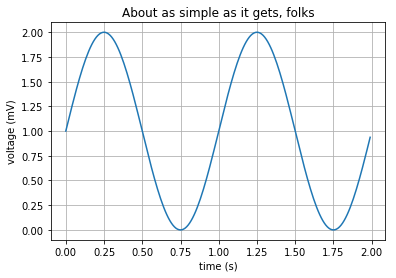

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

?fig.savefig("test.png")
plt.show()

# Multiple subplots

Simple demo with multiple subplots.

Signature: `plt.subplot(*args, **kwargs)`

Docstring:
Return a subplot axes positioned by the given grid definition.

Typical call signature::

  `subplot(nrows, ncols, plot_number)`

Where *nrows* and *ncols* are used to notionally split the figure
into ``nrows * ncols`` sub-axes, and *plot_number* is used to identify
the particular subplot that this function is to create within the notional
grid. *plot_number* starts at 1, increments across rows first and has a
maximum of ``nrows * ncols``.

In the case when *nrows*, *ncols* and *plot_number* are all less than 10,
a convenience exists, such that the a 3 digit number can be given instead,
where the hundreds represent *nrows*, the tens represent *ncols* and the
units represent *plot_number*.For instance::

  `subplot(211)`


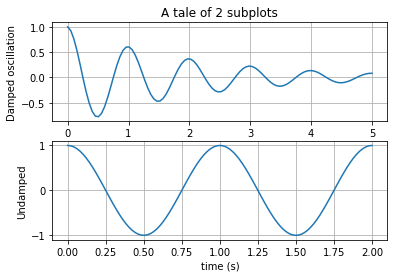

In [4]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0, 100)  # 3rd arg::num=50 default, means the length of the array.
x2 = np.linspace(0.0, 2.0, 100)

y1 = np.cos(2 * np.pi * x1) * np.exp(-0.5*x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(211)
plt.plot(x1, y1, '-')
plt.title('A tale of 2 subplots')
plt.grid()
plt.ylabel('Damped oscillation')

plt.subplot(212)
plt.plot(x2, y2, '-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.grid()
plt.show()

# Demo of the histogram (hist) function with a few features

In addition to the basic histogram, this demo shows a few optional features:

- Setting the number of data bins

- The `normed` flag, which normalizes bin heights so that the integral of the histogram is 1. The resulting histogram is an approximation of the probability density function.

- Setting the face color of the bars

- Setting the opacity (alpha value).

- Selecting different bin counts and sizes can significantly affect the shape of a histogram. The Astropy docs have a great section on how to select these parameters: http://docs.astropy.org/en/stable/visualization/histogram.html

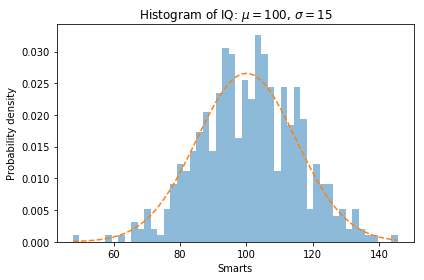

In [65]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

np.random.seed(1968801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(500)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1, alpha=0.5)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# PathPatch object

This example shows how to create `Paths` and `PathPatch` objects through Matplotlib’s API.



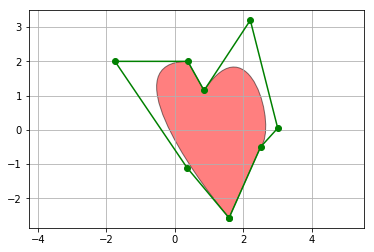

In [74]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.5, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
import matplotlib.path as mpath

a = [
    ('A', True,  1),
    ('B', False, 2),
    ('C', True, 3)
]

c, b, i = zip(*a)

print(c, b, i)

?np.meshgrid


('A', 'B', 'C') (True, False, True) (1, 2, 3)


# 3D surface (color map)
Demonstrates plotting a 3D surface colored with the coolwarm color map. The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the z axis tick labels.


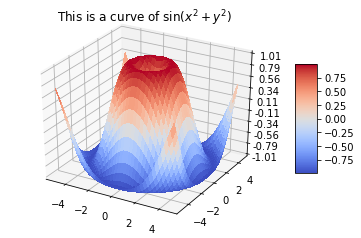

In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add a title
plt.title(r'This is a curve of $\sin(x^2+y^2)$')

plt.show()

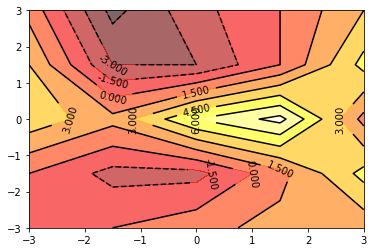

In [3]:
# -*- coding:utf-8 -*-
#引入numpy库和matplotlib库
import numpy as np
import matplotlib.pyplot as plt

# 定义等高线图的横纵坐标x，y
#从左边取值为从 -3 到 3 ，各取5个点，一共取 5*5 = 25 个点
x = np.linspace(-3, 3, 5)
y = np.linspace(-3, 3, 5)
# 将原始数据变成网格数据
X, Y = np.meshgrid(x, y)

# 各地点对应的高度数据
#Height是个 5*5 的数组，记录地图上 25 个点的高度汇总
Height = [[0,0,1,2,2],[0,-2,-2,1,5],[4,2,6,8,1],[3,-3,-3,0,5],[1,-5,-2,0,3]]

# 填充颜色
plt.contourf(X, Y, Height, 10, alpha = 0.6, cmap = plt.cm.hot)
# 绘制等高线
C = plt.contour(X, Y, Height, 10, colors = 'black')
# 显示各等高线的数据标签
plt.clabel(C, inline = True, fontsize = 10)
plt.show()